In [1]:
class Node:
    """ 
    A Node class for the Binary Search Tree class

    Attributes
    ----------
    l_child: Node/ None
        The left child of the node.
        If exists, the left child's data is smaller than the node's.
    r_child: Node/ None
        The right child of the node.
        If exists, the right child's data is larger than or equal to the node's.
    parent: Node/ None
        The parent of the node
    data: int
        The data of the node.
    """  
    def __init__(self, data):
        """
        Parameters
        ----------
        data: int
            The data of the node.
        """ 
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = data

    def __repr__(self):
        return f"Node {self.data}"

    def find_min(self):
        """
        Find the minimum node from the node's subtree

        Parameters
        ----------
        None

        Returns
        ----------
        Node
            The minimum node from the node's subtree

        """
        current = self
        while current.l_child is not None:
            current = current.l_child
        return current
    

    def next_largest(self):
        """
        Find the node with the next largest value compared to the current node

        Parameters
        ----------
        None

        Returns
        ----------
        Node
            The node with the next largest value

        """
        if self.r_child is not None:
            return self.r_child.find_min()
        current = self
        while current.parent is not None and current is current.parent.r_child:
            current = current.parent
        return current.parent

class BinarySearchTree:

    def __init__(self):
        self.root = None

    def to_string(self): 
        """
        Print the Binary Search Tree

        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        if self.root is None: 
            return 'Nil'
        self._print_tree(self.root, 0)

    def _print_tree(self, root, depth):
        """
        Recursively print the tree from the root

        Parameters
        ----------
        root: Node/ None
            the root of the subtree, if it exists
        depth: int
            the depth of the tree

        Returns
        ----------
        None
        """
        if not root: 
            return
        self._print_tree(root.l_child, depth + 1) 
        print('\t'* depth + '➡️ Node'+ str(root.data) +'')
        self._print_tree(root.r_child, depth + 1) 
        
        

    def insert(self, node):
        """
        Insert a node/ value of the node into the tree

        Parameters
        ----------
        node: Node/ int
            the node or the value of the node

        Returns
        ----------
        None
        """

        if type(node) is int: 
            node = Node(node)

        if self.root is None:
            self.root = node
            return
        else:
            self._insert_node(node, self.root)

    def _insert_node(self, node, root):
        """
        Insert a node into an existing subtree

        Parameters
        ----------
        root: Node
            the root of the subtree
        node: Node
            the node to be inserted

        Returns
        ----------
        None
        """
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
            else:
                self._insert_node(node, root.l_child)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                self._insert_node(node, root.r_child)

    def delete(self, value):
        """
        Delete the first node with the value found from the Binary Search Tree
        if it exists

        Parameters
        ----------
        value: int
            the value of the node to be removed

        Returns
        ----------
        Node/ None
            the node if it is found and deleted, otherwise None
        """
        node = self.search(value)
        if node is None:
            return None
        if node is self.root:
            pseudoroot = Node(None)
            pseudoroot.l_child = self.root
            self.root.parent = pseudoroot
            deleted = self._delete_node(self.root)
            self.root = pseudoroot.l_child
            if self.root is not None:
                self.root.parent = None
                return deleted
        else:
            return self._delete_node(node)

    def _delete_node(self, node):
        """
        Delete a specific node from the Binary Search Tree

        Parameters
        ----------
        node: Node
            the node to be removed

        Returns
        ----------
        Node
            the node that has been removed
        """
        if node.l_child is None or node.r_child is None:
            if node.parent.l_child is node:
                node.parent.l_child = node.l_child or node.r_child
                if node.parent.l_child is not None:
                    node.parent.l_child.parent = node.parent
            else:
                node.parent.r_child = node.r_child or node.l_child
                if node.parent.r_child is not None:
                    node.parent.r_child.parent = node.parent
            return node
        else:
            replacement = node.next_largest()
            replacement.data, node.data = node.data, replacement.data
            return self._delete_node(replacement)

    def search(self, value):
        """
        Search for a value in the Binary Search Tree

        Parameters
        ----------
        value: int
            the value that needs to be searched

        Returns
        ----------
        Node/ None
            the first node found, or None
        """
        if self.root is None:
            return None
        else:
            return self._search_value(value, self.root)

    def _search_value(self, value, root):
        """
        Search for a value from the root of the subtree

        Parameters
        ----------
        value: int
            the value that needs to be searched
        root: Node/ None
            the root of the subtree to search the value

        Returns
        ----------
        Node/ None
            the first node found, or None
        """
        if not root:
            return None
        if value == root.data:
            return root
        elif value < root.data:
            return self._search_value(value, root.l_child)
        else:
            return self._search_value(value, root.r_child)
    
    def inorder(self):
        """
        Return an array of the values in the tree in sorted order

        Parameters
        ----------
        None

        Returns
        ----------
        list
            the array of values in sorted order
        """
        if not self.root: 
            return []
        lst = []
        root = self.root
        def sub_inorder(root):
            if root is not None:
                sub_inorder(root.l_child)
                lst.append(root.data)
                sub_inorder(root.r_child)
        sub_inorder(root)
        return lst

In [2]:
def depth(bst, node):
    """
    Finds the depth of the node in a BST. Depth of root is 0.

    Parameters
    ----------
    node: Node
        An existing node in the BST that we need to compute the depth of

    Returns
    ----------
    int
        the depth from root of the tree to node
    """
    current_node = node
    depth = 0
    while current_node.parent != None:
        current_node = current_node.parent
        depth += 1
    return depth


import math
bst = BinarySearchTree()
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    bst.insert(node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [3]:
def max_depth(bst, root):
    """
    Finds the maximum depth of the node.
    
    Input:
    - node: a Node, the root of the node
    
    Output:
    - h: int, the maximum depth in a node
    """
    if root == None:
        return -1

    leftDepth = max_depth(bst, root.l_child)
    rightDepth = max_depth(bst, root.r_child)

    if leftDepth > rightDepth:
        return leftDepth + 1
    else:
        return rightDepth + 1

In [4]:
def average_comparisons(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 

    Parameters
    ----------
    bst: BinarySearchTree
        The binary search tree to find the comparisons

    Returns
    ----------
    float
        the average number of comparisons
    """
    comparisons = 0
    
    all_nodes = bst.inorder()
    
    for node in all_nodes:
        comparisons += depth(bst, bst.search(node)) + 1
    
    return comparisons/len(all_nodes)

In [5]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Input:
    - bst: a Node, root of the BST
    
    Output:
    - avg_d: float, average depth of the BST
    """
    return average_comparisons(bst)-1

In [23]:
bst = BinarySearchTree()
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    bst.insert(node)
    
    
average_comparisons(bst)

2.7777777777777777

In [32]:

import random

bst = BinarySearchTree()

#Creating the shuffled lists

shuffled_lists = []

for i in range(200,10000,200):
    dummy_list = list(range(i))
    random.shuffle(dummy_list)
    shuffled_lists.append(dummy_list)

shuffled_trees = []
max_depths = []
avg_depths = []


for i in shuffled_lists:
    average_max_depth = 0
    average_average_depth = 0
    
    bst.root = Node(i[0])
    for node in i[1:]:
        bst.insert(Node(node))
        
    max_depths.append(max_depth(bst, bst.root))
    avg_depths.append(avg_depth(bst))

    
     
    

TypeError: 'int' object is not subscriptable

In [19]:
a = [1,2,3,4,5,6,7,8,9]
print(random.shuffle(a))

None


In [40]:

import random

bst = BinarySearchTree()

#Creating the shuffled lists

shuffled_lists = []

for i in range(200,10000,200):
    dummy_list = list(range(i))
    random.shuffle(dummy_list)
    shuffled_lists.append(dummy_list)

shuffled_trees = []
max_depths = []
avg_depths = []


for i in shuffled_lists:
    average_max_depth = 0
    average_average_depth = 0
    avgmaxs = []
    avgavgs = []
    for j in range(50):
        bst.root = Node(i[0])
        for node in i[1:]:
            bst.insert(Node(node))
        avgmaxs.append(max_depth(bst, bst.root))
        avgavgs.append(avg_depth(bst))
  
    max_depths.append(sum(avgmaxs)/len(avgmaxs))
    avg_depths.append(sum(avgavgs)/len(avgavgs))

    
     
    

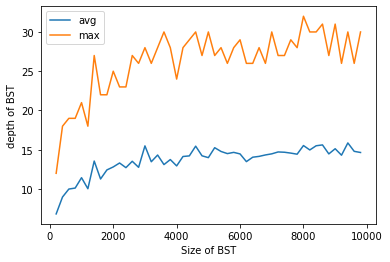

In [43]:
import matplotlib.pyplot as plt

x_list = range(200,10000,200)

plt.plot(x_list,avg_depths)
plt.plot(x_list,max_depths)
plt.xlabel('Size of BST')
plt.ylabel('depth of BST')
plt.legend(['avg','max'])
plt.show()

In [6]:
lst = [1,2,3,12,14]
bst = BinarySearchTree()

for a in lst:
    bst.insert(a)
    
    
average_comparisons(bst)

3.0